In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
S2 = ft.zeros_aligned((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [4]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.036237478256225586


In [5]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

51.500662088394165


In [6]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

47.22493529319763


In [7]:
del lw2,lS2

In [10]:
start = time.time()

w2 = 0.5*w2

end = time.time()
print(end-start)

3.7454707622528076


In [9]:
start = time.time()

w2 = np.multiply(0.5,w2)#0.5*w2

end = time.time()
print(end-start)

3.8120357990264893


In [11]:
avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

62.3046 249.219 3.0


In [12]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

9.23619556427002


In [13]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [ ]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

In [13]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [14]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[w2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 118.57418823242188
time : 115.12964725494385
time : 111.3081123828888
time : 111.40891480445862
time : 111.53131604194641
time : 110.54320740699768


In [15]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[S2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 113.90385460853577
time : 110.70310664176941
time : 117.07199788093567
time : 111.9353973865509
time : 112.38515448570251
time : 114.95191311836243


t = 1*sigma_2: Linear fit [alpha A] = [-0.1037311  -0.80187054]
t = 2*sigma_2: Linear fit [alpha A] = [-0.18202561 -1.0192294 ]
t = 3*sigma_2: Linear fit [alpha A] = [-0.24496054 -1.13519577]
t = 1*sigma_2: Linear fit [alpha A] = [-0.14190173 -0.39593325]
t = 2*sigma_2: Linear fit [alpha A] = [-0.27253386 -0.44104948]
t = 3*sigma_2: Linear fit [alpha A] = [-0.38051184 -0.41303416]


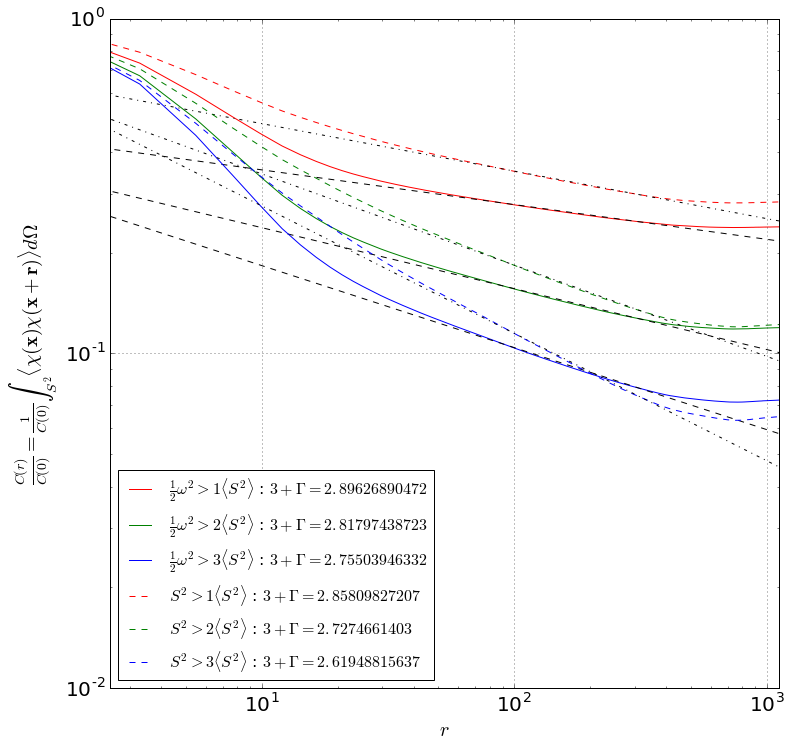

In [22]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-2),10**0])
plt.grid()
    
for i in range(3):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':16})
plt.savefig('twopoint-enstrophy-dissipation-0.pdf')

t = 4*sigma_2: Linear fit [alpha A] = [-0.29875631 -1.20635975]
t = 5*sigma_2: Linear fit [alpha A] = [-0.34622119 -1.2527781 ]
t = 6*sigma_2: Linear fit [alpha A] = [-0.38919419 -1.28306311]
t = 4*sigma_2: Linear fit [alpha A] = [-0.47323264 -0.36091899]
t = 5*sigma_2: Linear fit [alpha A] = [-0.55481593 -0.30024413]
t = 6*sigma_2: Linear fit [alpha A] = [-0.62780744 -0.2378036 ]


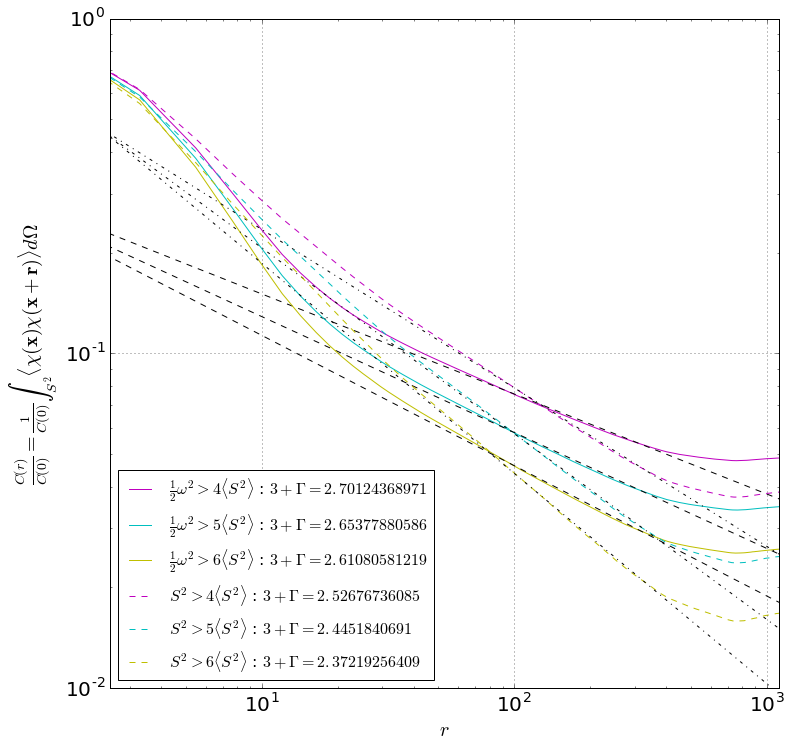

In [23]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-2),10**0])
plt.grid()
    
for i in range(3,6,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3,6,1):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':16})
plt.savefig('twopoint-enstrophy-dissipation-1.pdf')

In [24]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[w2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 114.58782029151917
time : 113.40583419799805
time : 110.10012674331665
time : 113.97888159751892
time : 106.94121527671814
time : 106.11510491371155


In [25]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[S2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 105.36219263076782
time : 106.45452499389648
time : 105.102774143219
time : 108.73109316825867
time : 103.16167306900024
time : 104.60728573799133


t = 7*sigma_2: Linear fit [alpha A] = [-0.42833865 -1.30398591]
t = 10*sigma_2: Linear fit [alpha A] = [-0.52904365 -1.33604367]
t = 15*sigma_2: Linear fit [alpha A] = [-0.66149605 -1.34197488]
t = 7*sigma_2: Linear fit [alpha A] = [-0.69429671 -0.17518828]
t = 10*sigma_2: Linear fit [alpha A] = [-0.86684914  0.0101391 ]
t = 15*sigma_2: Linear fit [alpha A] = [-1.09942954  0.29441468]


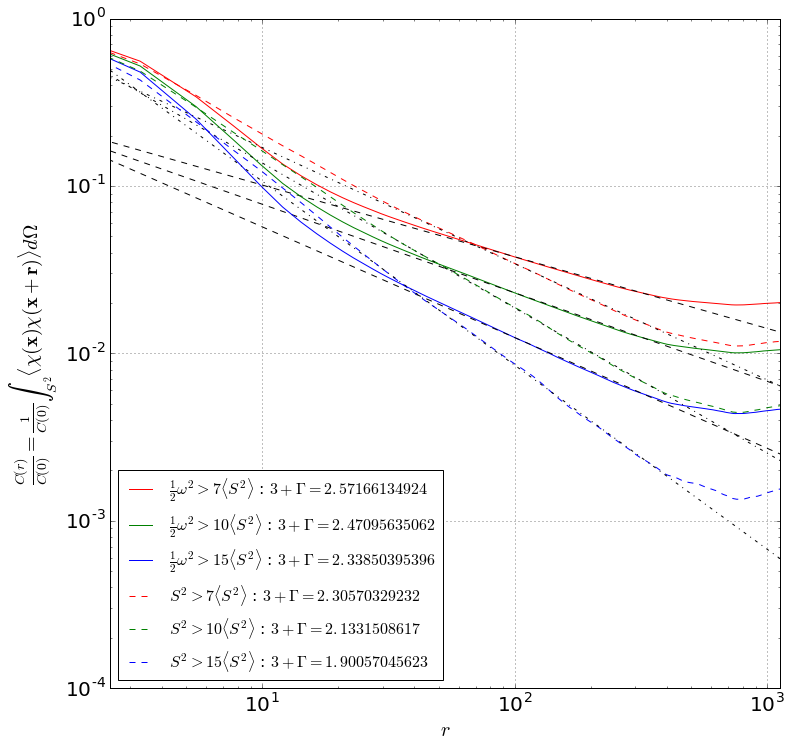

In [28]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-4),10**0])
plt.grid()
    
for i in range(3):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':16})
plt.savefig('twopoint-enstrophy-dissipation-2.pdf')

t = 20*sigma_2: Linear fit [alpha A] = [-0.76617059 -1.33290959]
t = 30*sigma_2: Linear fit [alpha A] = [-0.9318838  -1.29487985]
t = 50*sigma_2: Linear fit [alpha A] = [-1.17284893 -1.20599693]
t = 20*sigma_2: Linear fit [alpha A] = [-1.29125325  0.54352279]
t = 30*sigma_2: Linear fit [alpha A] = [-1.62146798  1.03183245]
t = 50*sigma_2: Linear fit [alpha A] = [-2.32103928  2.73383266]


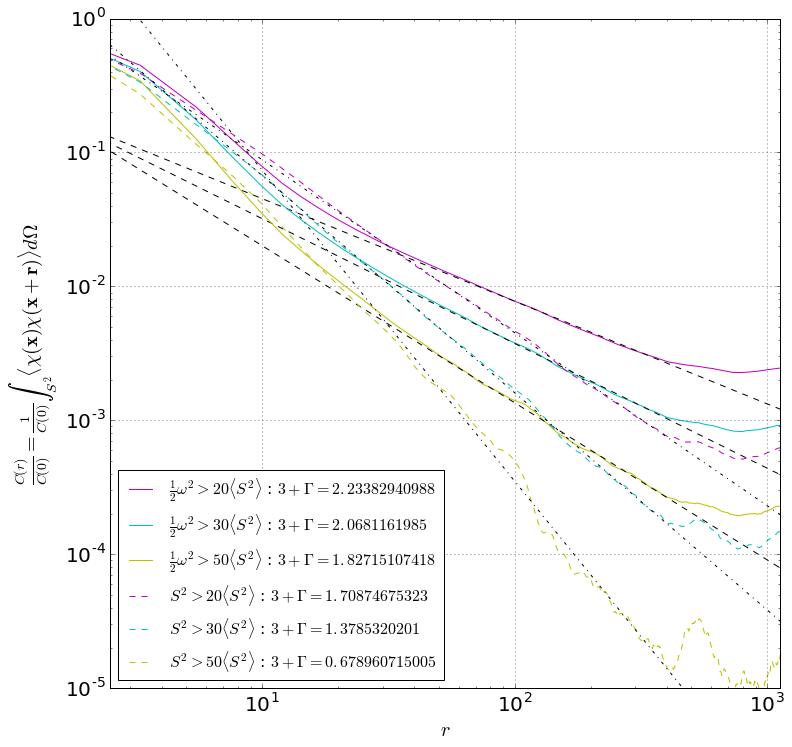

In [31]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-5),10**0])
plt.grid()
    
for i in range(3,6,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3,6,1):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':16})
plt.savefig('twopoint-enstrophy-dissipation-3.pdf')

In [40]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(S2 > t*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 118.82612180709839
time : 113.40076184272766
time : 112.50853061676025
time : 112.63090467453003
time : 110.89516115188599
time : 111.9057719707489


t = 1*sigma_2: Linear fit [alpha A] = [-0.18941494 -0.75348794]
t = 2*sigma_2: Linear fit [alpha A] = [-0.32522653 -0.86618457]
t = 3*sigma_2: Linear fit [alpha A] = [-0.43276663 -0.88515914]
t = 4*sigma_2: Linear fit [alpha A] = [-0.52365485 -0.86933608]
t = 5*sigma_2: Linear fit [alpha A] = [-0.60299628 -0.83903311]
t = 6*sigma_2: Linear fit [alpha A] = [-0.67371551 -0.80282244]


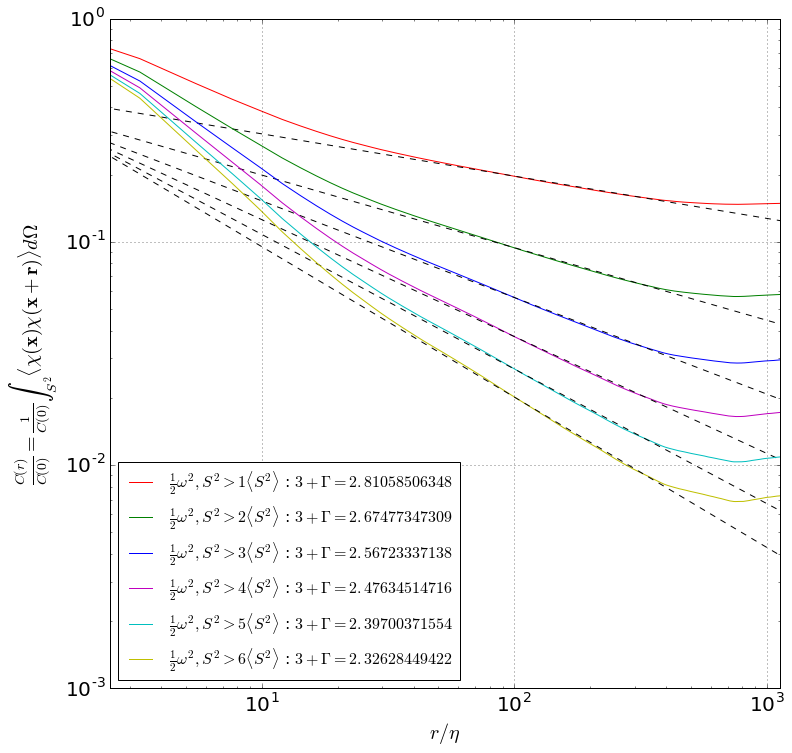

In [41]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**0])
plt.grid()
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2,S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.legend(loc='lower left',prop={'size':16})
plt.savefig('twopoint-enstrophy+dissipation-0.pdf')

In [35]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(S2 > t*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 117.51735997200012
time : 110.65290474891663
time : 114.5320565700531
time : 110.92075538635254
time : 113.06998181343079
time : 108.85294890403748


t = 7*sigma_2: Linear fit [alpha A] = [-0.73792286 -0.76435331]
t = 10*sigma_2: Linear fit [alpha A] = [-0.9051417  -0.63487836]
t = 15*sigma_2: Linear fit [alpha A] = [-1.13314647 -0.4079769 ]
t = 20*sigma_2: Linear fit [alpha A] = [-1.32020502 -0.20810164]
t = 30*sigma_2: Linear fit [alpha A] = [-1.66108213  0.29276804]
t = 50*sigma_2: Linear fit [alpha A] = [-2.56448348  2.96843845]


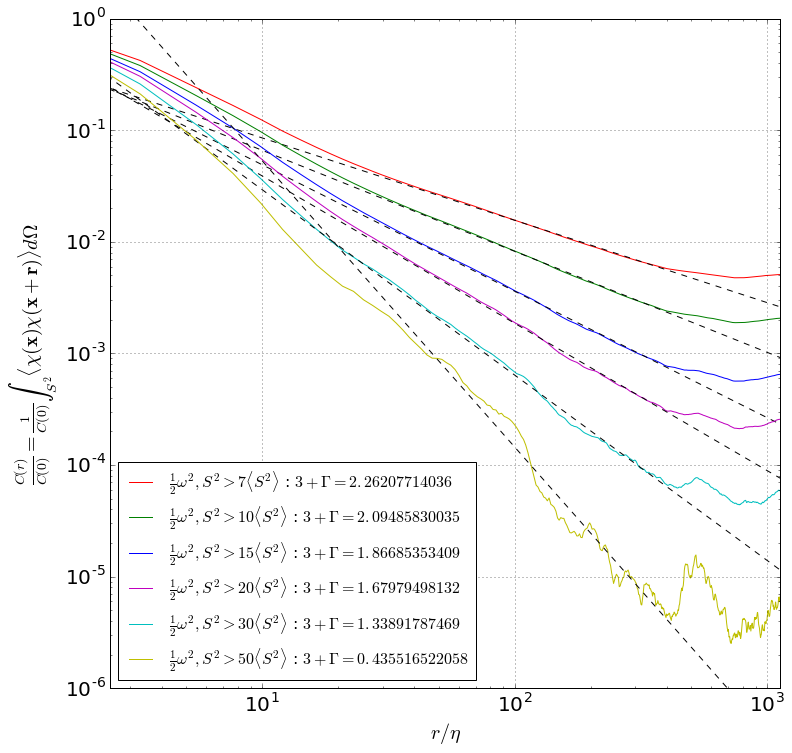

In [39]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-6),10**0])
plt.grid()
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2,S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma ='+str(3+fit[0])+r'$')
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.legend(loc='lower left',prop={'size':16})
plt.savefig('twopoint-enstrophy+dissipation-1.pdf')